- codificar.py: programa que oculta mensagem de texto na imagem.
- decodificar.py: programa que recupera mensagem de texto da imagem.
- imagem_entrada.png: imagem no formato PNG em que sera embutida a mensagem. ´
- imagem_saida.png: imagem no formato PNG com mensagem embutida.
- texto_entrada.txt: arquivo-texto contendo mensagem a ser oculta.
- texto_saida.txt: arquivo-texto contendo mensagem recuperada.
- plano_bits: trˆes planos de bits menos significativos representados pelos valores 0, 1 ou 2.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
#Lib to define the argument when call the file
import argparse

In [3]:
# Paramets to read the origin image and text file
parser = argparse.ArgumentParser(description='Stenographing')
parser.add_argument('--input_image', default='baboon.png', help='Name of the input Image')
parser.add_argument('--input_text', default='input_text.txt', help='Name of input text to stenograph')
parser.add_argument('--bit_plain', default=2, help='Set how many bits will be used to stenograph  the mensage (1,2 or 3)')
parser.add_argument('--out_image', default='output_image.png', help='Name of input text to stenograph')
parser.add_argument('--out_text', default='output_text.txt', help='Name of output text to stenograph')

parser.add_argument('-f')
opt = parser.parse_args()

## Read Image

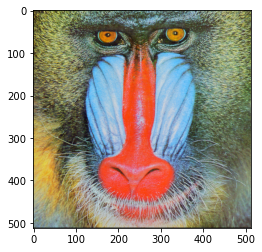

In [4]:
img = cv2.imread(opt.input_image)
# img = cv2.imread("baboon.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

## Convert image to binary

In [5]:
width = img.shape[0] 
height = img.shape[1]

## Converting mesage to bits

### Text to binary

In [6]:
def toBinary(string):
    binary_string = ''.join(format(ord(x), 'b').zfill(8) for x in string)
    return binary_string

In [7]:
#Code to find the inittial and final of message
secrect_code = "@@@"
bin_secrect_code = toBinary(secrect_code)
bin_secrect_code

'010000000100000001000000'

### Read the text file

In [8]:
with open(opt.input_text) as f:
# with open('input_text.txt') as f:
    lines = f.readlines()

In [9]:
#A scratch message to test
scratch_msg = toBinary(lines[0])
scratch_msg

'01001001011100110110000101100010011001010110110001100001001000000111010001100101001000000100000101101101011011110010000000111100001100110011110000110011'

In [10]:
test_to_write = bin_secrect_code + scratch_msg + bin_secrect_code
test_to_write

'01000000010000000100000001001001011100110110000101100010011001010110110001100001001000000111010001100101001000000100000101101101011011110010000000111100001100110011110000110011010000000100000001000000'

### Insert message into bits

In [11]:
bin_msg = test_to_write

In [12]:
msg_size = len(bin_msg)
msg_size

200

In [13]:
bin_msg_int = np.array([int(char) for char in bin_msg])

In [14]:
# BIT_MAP = opt.bit_plain
BIT_MAP = 2

In [15]:
#Test if the image have suficient rows to mensagem
rows_mensage = int(len(bin_msg_int)/BIT_MAP)
rows_mensage

100

In [16]:
msg_formated = bin_msg_int.reshape(rows_mensage, BIT_MAP)

In [17]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y

In [18]:
msg_formated.shape

(100, 2)

## Writing mensage into image

In [19]:
def array_to_string(array):
    array = np.array2string(array)
    return ''.join(c for c in array if c.isdigit())

In [20]:
img1 = img.copy()
for count, row in enumerate(msg_formated):

    pt1 = format(rgb_img[0][count][0], '08b')[:8-BIT_MAP]
    pt2 = array_to_string(row)
    img1[0][count][0] = int(pt1+pt2)

In [21]:
# cv2.imwrite(opt.out_image, img1)
cv2.imwrite('baboon_text_cv2.png', img1)

True

In [22]:
np.unique(img1 == img, return_counts=True)

(array([False,  True]), array([   100, 786332], dtype=int64))

In [23]:
# cv2.imshow("image", img1)
# cv2.waitKey()

## Exctrating the text from image

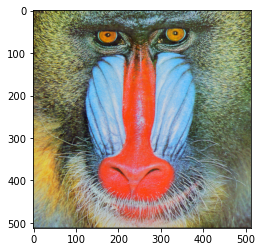

In [24]:
# img_read = cv2.imread(opt.out_image)
img_read = cv2.imread('baboon_text_cv2.png')
rgb_read_img = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_read_img)
plt.show()

In [25]:
list_caracteres = []

for count, row in enumerate(img_read[0]):

    list_caracteres.append(format(img_read[0][count][0], '08b')[8-BIT_MAP:])

In [26]:
import re

In [27]:
binary_channel = array_to_string(np.reshape(list_caracteres, -1))

In [28]:
extracted_text = re.search(rf"{bin_secrect_code}(.*?){bin_secrect_code}", binary_channel).group(1)

In [29]:
exctracted_list = re.findall('........?', extracted_text)

In [30]:
decifred_word = ''

for word in exctracted_list:
    decifred_word += (chr(int(word, 2)))

In [31]:
decifred_word

'Isabela te Amo <3<3'

In [32]:
with open(opt.out_text, "w") as text_file:
    print(decifred_word, file=text_file)